In [33]:
import h5py
import brighteyes_flim as flim
import matplotlib.pyplot as plt
import numpy as np
import brighteyes_ism.analysis.Graph_lib as gr
from scipy.ndimage import shift
from skimage.registration import phase_cross_correlation
import brighteyes_ism.dataio.mcs as mcs

### Load the 4D (x,y,t,ch) h5 dataset of the G3BP1. Realignment of the time bins across the 25 channels was performed with the libttp library

In [34]:
h = h5py.File(r"C:\Users\fdelbufalo\Desktop\images\G3BP1_29_05_2024","r")
print(h.keys())
img = h["dataset_1"]
print(img.shape)


<KeysViewHDF5 ['dataset_1']>
(512, 512, 260, 25)


### Sum over the pixels ((x,y) dimensions of the datast) and display the TCSPC histograms along the channels

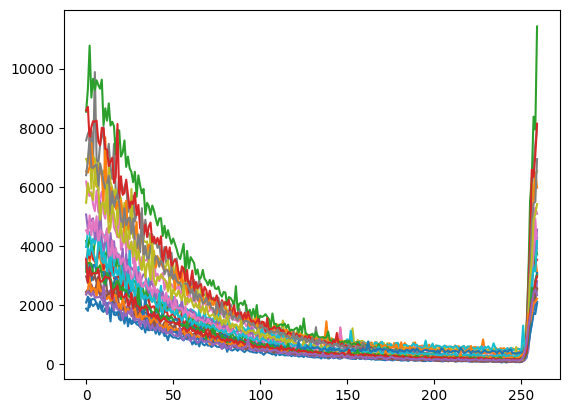

In [4]:
data_hist = np.sum(img, axis=(0,1))
plt.figure()
for i in range(data_hist.shape[-1]):
    plt.plot(data_hist[:, i])

### Perform APR on each time bin to realign the 25 micro-images of the ISM dataset 

(512, 512, 25)


C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\Lib\site-packages\brighteyes_ism\analysis\Graph_lib.py:548: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(shift[:, 0], shift[:, 1], s=80, c=color, edgecolors='black', cmap=cmap)


[[ 0.36  0.99]
 [ 0.09  1.03]
 [-0.35  0.85]
 [-0.8   0.69]
 [-1.19  0.45]
 [ 0.6   0.59]
 [ 0.28  0.55]
 [-0.13  0.37]
 [-0.59  0.23]
 [-1.05  0.05]
 [ 0.8   0.26]
 [ 0.42  0.14]
 [ 0.    0.  ]
 [-0.42 -0.16]
 [-0.94 -0.38]
 [ 0.99 -0.11]
 [ 0.6  -0.24]
 [ 0.12 -0.39]
 [-0.29 -0.59]
 [-0.85 -0.88]
 [ 1.12 -0.56]
 [ 0.72 -0.59]
 [ 0.32 -0.78]
 [-0.13 -1.07]
 [-0.71 -1.36]]


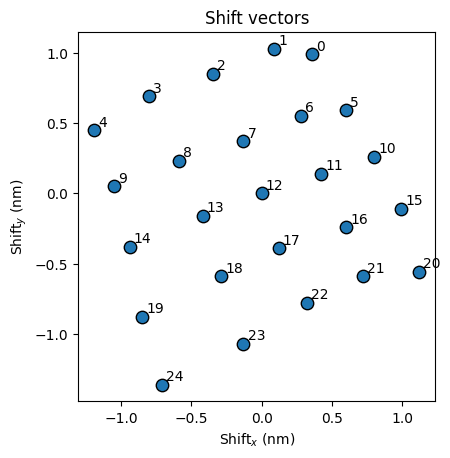

In [5]:
import brighteyes_ism.analysis.APR_lib as apr
image_3d = np.sum(img, axis = -2)
print(image_3d.shape)
shift_vectors, err = apr.ShiftVectors(image_3d, usf = 100, ref = 12)
gr.PlotShiftVectors(shift_vectors)
print (shift_vectors) 

In [6]:
from tqdm import tqdm
with h5py.File(r"C:\Users\fdelbufalo\Desktop\images\APR_G3BP1", 'w') as f:
     x_size, y_size, bin_size, channel_size = img.shape[0], img.shape[1], img.shape[2], img.shape[3]
# Create an empty dataset with dimensions (x,y,t, ch)
     dataset_shape = (x_size, y_size, bin_size, channel_size)
     h5_dataset = f.create_dataset('data', shape=dataset_shape, dtype=np.uint16)
    

     

     for bin in tqdm(range(img.shape[-2])):
         h5_dataset[:, :, bin, :] = apr.Reassignment(shift_vectors, img[:, :, bin, :], mode = 'interp')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 260/260 [09:43<00:00,  2.25s/it]


### Calculate the intensity image (x,y) summing along the time and channels' dimensions ((t,ch) of the ISM dataset)

In [7]:
h_apr = h5py.File(r"C:\Users\fdelbufalo\Desktop\images\APR_G3BP1","r")
print(h_apr.keys())
img_apr = h_apr["data"]
print(img_apr.shape)

<KeysViewHDF5 ['data']>
(512, 512, 260, 25)


In [8]:
data_intensity = np.sum(img_apr, axis=(2,3)) 
print(data_intensity.shape)

(512, 512)


### Show APR intensity image and compare it with the image of the central channel (closed confocal)

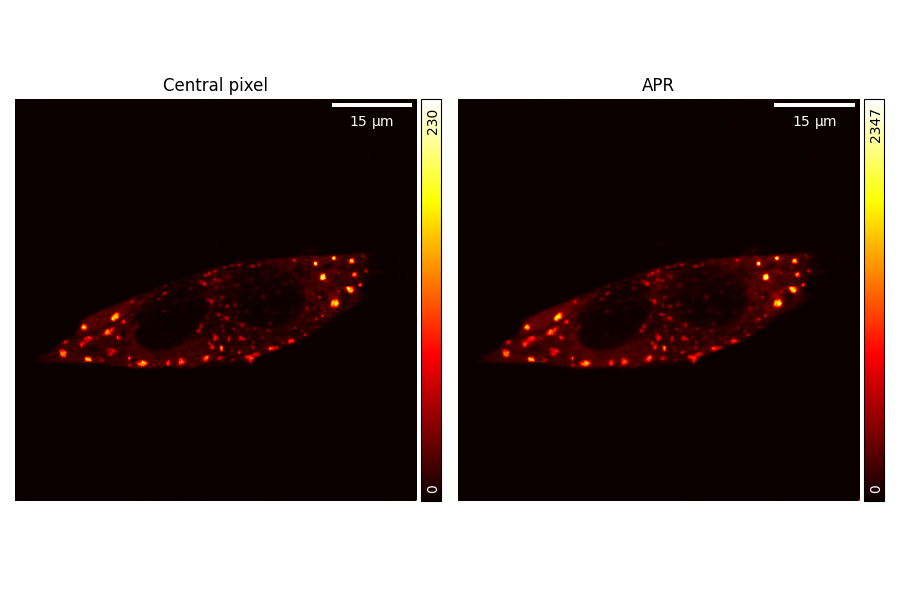

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(9,6))

gr.ShowImg(image_3d[:,:,12], pxsize_x = 0.146, fig = fig, ax = ax[0])
ax[0].set_title('Central pixel')

gr.ShowImg(data_intensity, pxsize_x = 0.146, fig = fig, ax = ax[1])
ax[1].set_title('APR')

fig.tight_layout()

### Plot the histograms of the number of photons in the X x Y pixels

(array([ 2463.,  9947., 21198., 31381., 36019., 34617., 28762., 20883.,
        13936.,  8786.,  5026.,  2888.,  1658.,  1028.,   629.,   499.,
          460.,   393.,   387.,   331.,   351.,   355.,   336.,   382.,
          344.,   363.,   338.,   329.,   357.,   389.,   381.,   324.,
          299.,   344.,   302.,   302.,   314.,   270.,   283.,   261.,
          259.,   254.,   264.,   231.,   227.,   224.,   225.,   228.,
          207.,   436.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

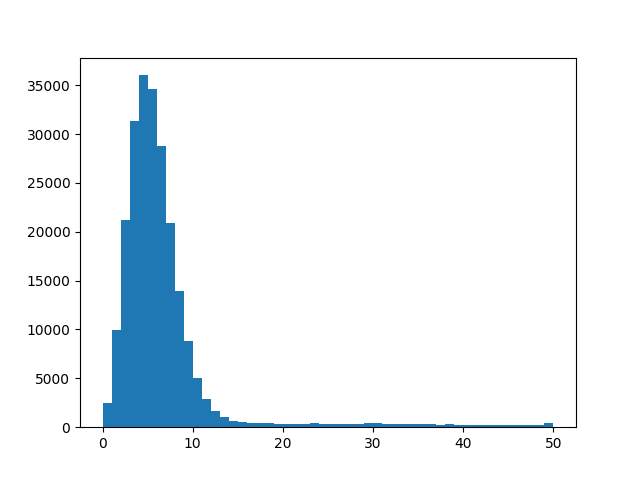

In [13]:
plt.figure()
plt.hist(data_intensity.flatten(), bins = 50 , range = (0, 50))

### Calculate the phasors for each pixel's TCSPC histogram of the ISM dataset and display the results in the phasor plot

In [10]:
with h5py.File(r"C:\Users\fdelbufalo\Desktop\images\APR_G3BP1","r") as f:
    
     print(f.keys())
     data_input = f["data"]  

     flim.phasor_h5(data_path = r"C:\Users\fdelbufalo\Desktop\images\APR_G3BP1", data_input = data_input) 

<KeysViewHDF5 ['data']>


C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\src\brighteyes_flim\flism.py:383: RuntimeWarning: invalid value encountered in divide
  out = transform / flux


<KeysViewHDF5 ['h5_dataset_phasor_pix']>
(512, 512)


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='g', ylabel='s'>)

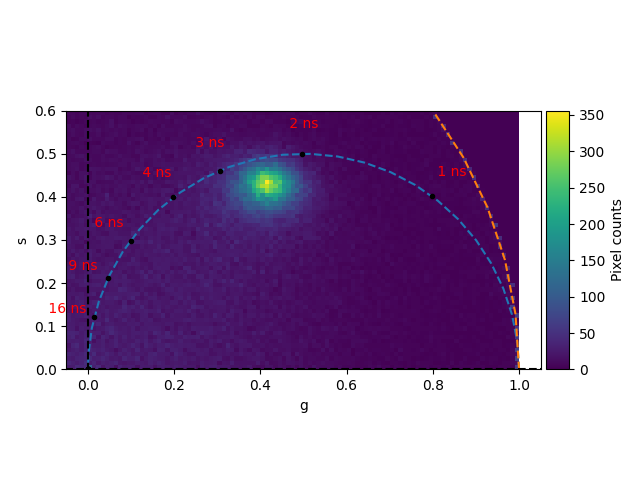

In [52]:
%matplotlib widget

hf_phasors_per_pixel = h5py.File( r"C:\Users\fdelbufalo\Desktop\images\APR_G3BP1_phasors_matrix.h5", "r")
print(hf_phasors_per_pixel.keys())

phasors_pix = hf_phasors_per_pixel["h5_dataset_phasor_pix"]  # data with phasors in each pixel

print(phasors_pix.shape)

flim.plot_phasor(phasors_pix[:], bins_2dplot=200, log_scale=False, quadrant='first', dfd_freq = 80e6)

### Calculate the fluorescence lifetime from the phasor for each pixel with the formula below (f =  laser rep rate frequency):
### τφ = (1/(2πf)) * tan(φ)
### φ = arctan(s/g)
### g = Re{phasors_pix}
### s = Im{phasors_pix}

In [53]:
tau_phi = flim.calculate_tau_phi(np.real(phasors_pix[:]), np.imag(phasors_pix[:]), dfd_freq = 80e6)
print(tau_phi.shape)

(512, 512)


### Calculate the fluorescence lifetime from the phasor for each pixel with the formula below (f = dfd frequency or laser rep rate frequency):
### τ<sub>m</sub> = (1/2*π*f) * √(1/m<sup>2</sup> - 1)
### m = √g<sup>2</sup> + s<sup>2</sup>
### g = Re{phasor_corrected}
### s = Im{phasor_corrected}

In [54]:
tau_m = flim.calculate_tau_m(np.real(phasors_pix), np.imag(phasors_pix), dfd_freq = 80e6)
print(tau_m.shape)

(512, 512)


C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\src\brighteyes_flim\flism.py:413: RuntimeWarning: divide by zero encountered in divide
  tau_m = np.sqrt((1. / (m ** 2)) - 1) / (2 * np.pi * dfd_freq)


### Visualize histograms of tau distribution in the pixels

(array([ 1034.,  1323.,  1398.,  1531.,  1715.,  1921.,  2263.,  2486.,
         2844.,  3363.,  3775.,  4553.,  5413.,  6288.,  7310.,  8468.,
         9537., 10923., 11232., 11292., 10879., 10390., 10316., 12442.,
        18012., 17271.,  9865.,  6012.,  4289.,  3541.,  2860.,  2340.,
         2045.,  1847.,  1727.,  1541.,  1272.,  1325.,   977.,   944.,
          787.,   827.,   734.,   757.,   553.,   608.,   640.,   392.,
          449.,   356.]),
 array([-6.  , -5.68, -5.36, -5.04, -4.72, -4.4 , -4.08, -3.76, -3.44,
        -3.12, -2.8 , -2.48, -2.16, -1.84, -1.52, -1.2 , -0.88, -0.56,
        -0.24,  0.08,  0.4 ,  0.72,  1.04,  1.36,  1.68,  2.  ,  2.32,
         2.64,  2.96,  3.28,  3.6 ,  3.92,  4.24,  4.56,  4.88,  5.2 ,
         5.52,  5.84,  6.16,  6.48,  6.8 ,  7.12,  7.44,  7.76,  8.08,
         8.4 ,  8.72,  9.04,  9.36,  9.68, 10.  ]),
 <BarContainer object of 50 artists>)

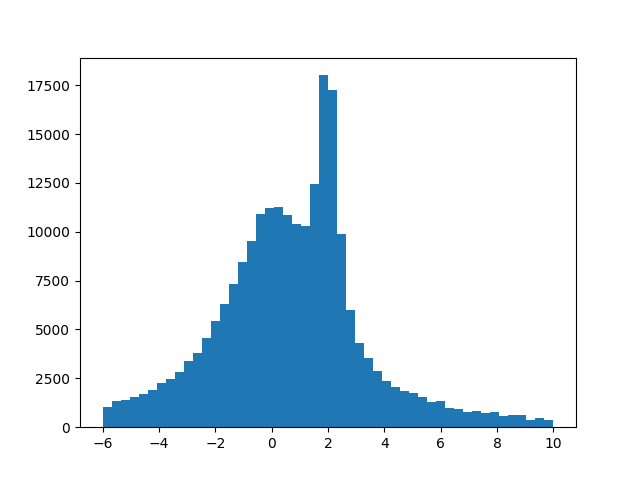

In [55]:
tau_data = 1e9*tau_phi.flatten()

plt.figure()
plt.hist(tau_data, range = (-6, 10), bins = 50)

(array([13062.,  3138.,  3415.,  4243.,  4899.,  5705.,  6248.,  7565.,
        11217., 17492., 19597., 15000., 11676., 10339.,  8903.,  8257.,
         7394.,  6768.,  6532.,  5790.,  5534.,  5576.,  4631.,  4258.,
         3810.,  3412.,  3186.,  2775.,  2620.,  2530.,  2201.,  2081.,
         2050.,  1788.,  1775.,  1498.,  1603.,  1321.,  1225.,  1299.,
         1067.,  1205.,   935.,   959.,   988.,   768.,   708.,   698.,
          820.,   620.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14, 10.4 , 10.66, 10.92, 11.18, 11.44,
        11.7 , 11.96, 12.22, 12.48, 12.74, 13.  ]),
 <BarContainer object of 50 artists>)

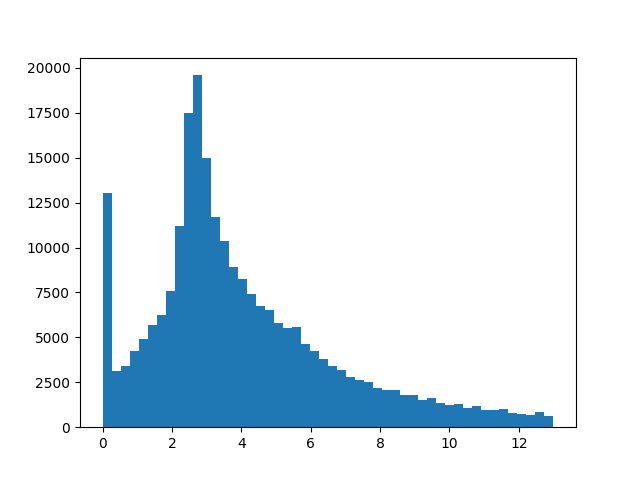

In [56]:
tau_m_data = 1e9*tau_m.flatten()

plt.figure()
plt.hist(tau_m_data, range = (0, 13), bins = 50)

### Display and save the FLIM image representing the lifetime and intensity with a 2D colormap

C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\Lib\site-packages\brighteyes_ism\analysis\Graph_lib.py:660: RuntimeWarning: invalid value encountered in cast
  idx = (np.floor((variable - self.var_bounds[0]) / (self.var_bounds[1] - self.var_bounds[0]) * N)).astype(int)


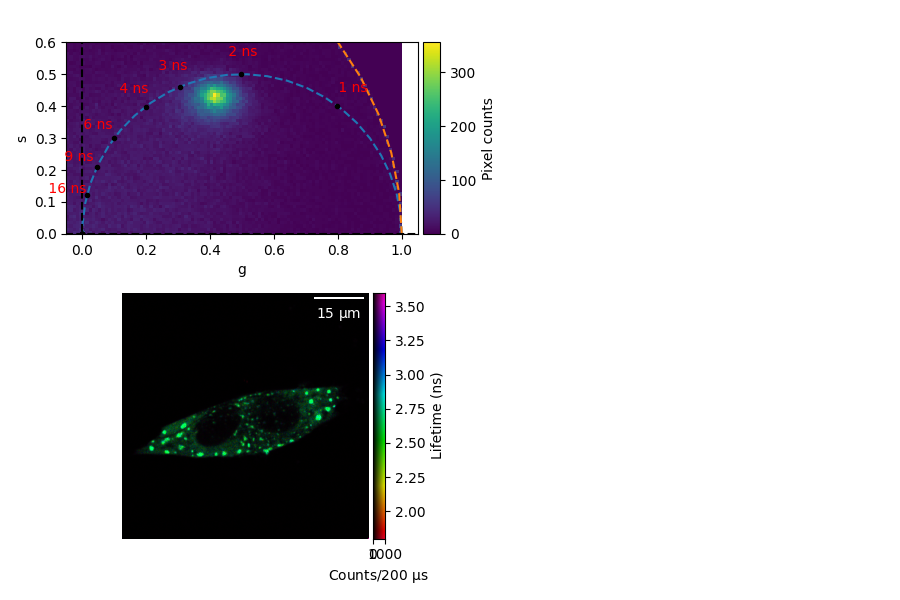

In [31]:
fig = plt.figure(figsize = (9, 6))
gs = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[2:4, 0:2])
flim.plot_phasor(phasors_pix[:], bins_2dplot=200, log_scale=False, quadrant='first', fig = fig, ax = ax1, dfd_freq = 80e6)
gr.show_flim(data_intensity, tau_m*1e9, pxsize = 0.146, pxdwelltime =
             200, lifetime_bounds = (1.8, 3.6), intensity_bounds = (0, 1000),
             fig = fig, ax = ax2)  
fig.tight_layout()
plt.savefig(r"C:\Users\fdelbufalo\Desktop\PDF_processed_images\G3BP1_lifetime_and_phasor.pdf", dpi = 900)

### Comparison FLISM vs Closed Confocal FLIM (FLIM image on the 12th channel (central pixel of the SPAD array detector))

In [22]:
flim.phasor_h5(data_path = r"C:\Users\fdelbufalo\Desktop\images\G3BP1_29_05_2024", data_input = img[:, :, :, 12]) 

C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\src\brighteyes_flim\flism.py:383: RuntimeWarning: invalid value encountered in divide
  out = transform / flux


<Closed HDF5 dataset>

<KeysViewHDF5 ['h5_dataset_phasor_pix']>
(512, 512)


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='g', ylabel='s'>)

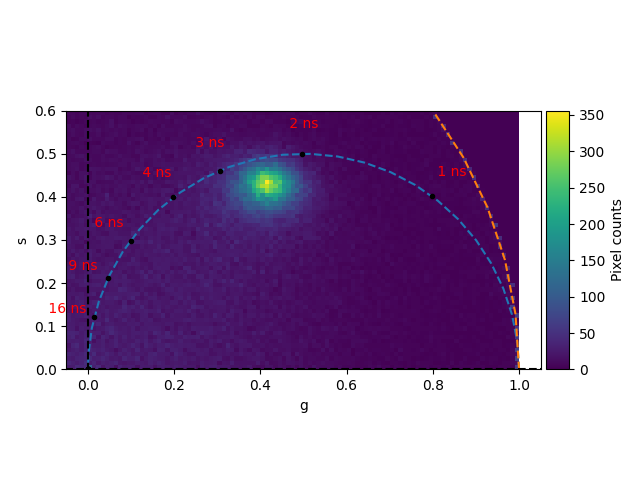

In [60]:
%matplotlib widget

hf_phasors_per_pixel_12_channel = h5py.File( r"C:\Users\fdelbufalo\Desktop\images\APR_G3BP1_phasors_matrix.h5", "r")
print(hf_phasors_per_pixel_12_channel.keys())

phasors_pix_12_ch = hf_phasors_per_pixel_12_channel["h5_dataset_phasor_pix"]  # data with phasors in each pixel for the 12th channel

print(phasors_pix_12_ch.shape)

flim.plot_phasor(phasors_pix_12_ch[:], bins_2dplot=200, log_scale=False, quadrant='first', dfd_freq = 80e6)

### Lifetime calculation on the 12th channel's phasors

In [61]:
tau_m_12_ch = flim.calculate_tau_m(np.real(phasors_pix_12_ch), np.imag(phasors_pix_12_ch), dfd_freq = 80e6)
print(tau_m_12_ch.shape)

(512, 512)


(array([13062.,  3138.,  3415.,  4243.,  4899.,  5705.,  6248.,  7565.,
        11217., 17492., 19597., 15000., 11676., 10339.,  8903.,  8257.,
         7394.,  6768.,  6532.,  5790.,  5534.,  5576.,  4631.,  4258.,
         3810.,  3412.,  3186.,  2775.,  2620.,  2530.,  2201.,  2081.,
         2050.,  1788.,  1775.,  1498.,  1603.,  1321.,  1225.,  1299.,
         1067.,  1205.,   935.,   959.,   988.,   768.,   708.,   698.,
          820.,   620.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14, 10.4 , 10.66, 10.92, 11.18, 11.44,
        11.7 , 11.96, 12.22, 12.48, 12.74, 13.  ]),
 <BarContainer object of 50 artists>)

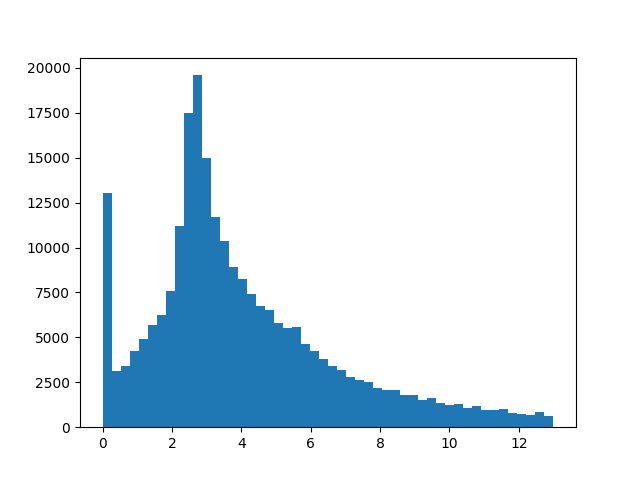

In [62]:
tau_m_data_12 = 1e9*tau_m_12_ch.flatten()

plt.figure()
plt.hist(tau_m_data_12, range = (0, 13), bins = 50)

In [63]:
data_intensity_12_ch = np.sum(img[:, :, :, 12], axis = 2)
print(data_intensity_12_ch.shape)

(512, 512)


(array([2.62134e+05, 1.00000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <BarContainer object of 5 artists>)

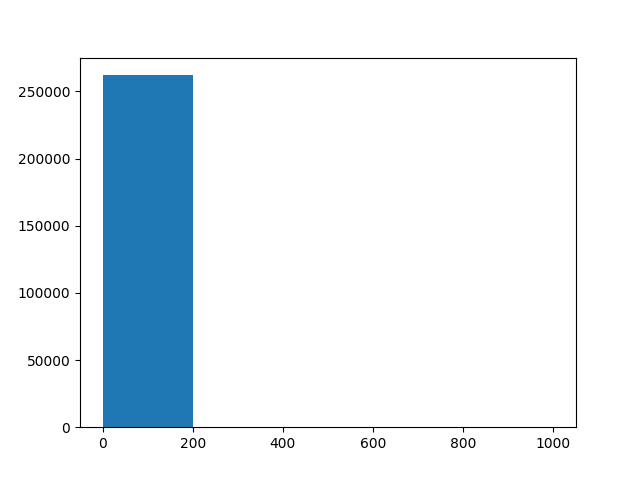

In [64]:
plt.figure()
plt.hist(data_intensity_12_ch.flatten(), bins = 5 , range = (0, 1000))

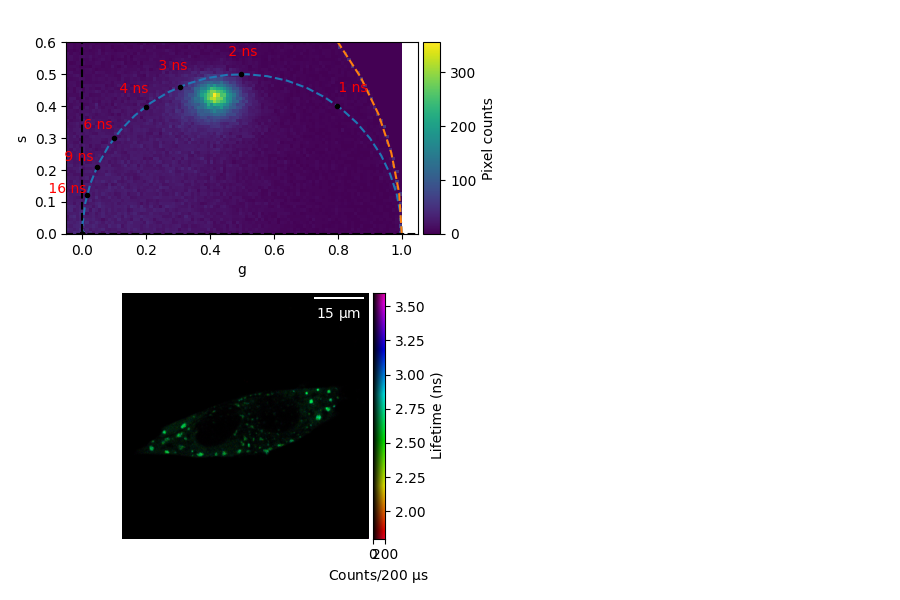

In [65]:
fig = plt.figure(figsize = (9, 6))
gs = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[2:4, 0:2])
flim.plot_phasor(phasors_pix_12_ch[:], bins_2dplot=200, log_scale=False, quadrant='first', fig = fig, ax = ax1, dfd_freq = 80e6)
gr.show_flim(data_intensity_12_ch, tau_m_12_ch*1e9, pxsize = 0.146, pxdwelltime =
             200, lifetime_bounds = (1.8, 3.6), intensity_bounds = (0, 200),
             fig = fig, ax = ax2)  
fig.tight_layout()
plt.savefig(r"C:\Users\fdelbufalo\Desktop\PDF_processed_images\G3BP1_lifetime_12_channel.pdf", dpi = 900)

### Comparing the FLIM image of the 12th channel and the FLIM image after performing APR on the detector's 25 channels

C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\venv\Lib\site-packages\brighteyes_ism\analysis\Graph_lib.py:660: RuntimeWarning: invalid value encountered in cast
  idx = (np.floor((variable - self.var_bounds[0]) / (self.var_bounds[1] - self.var_bounds[0]) * N)).astype(int)


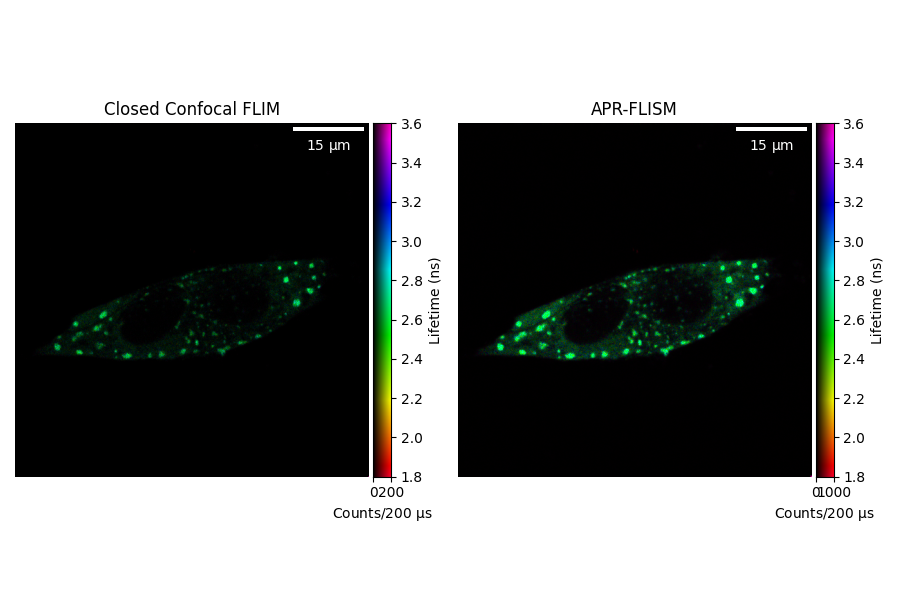

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(9,6))

gr.show_flim(data_intensity_12_ch, tau_m_12_ch*1e9, pxsize = 0.146, pxdwelltime =
             200, lifetime_bounds = (1.8, 3.6), intensity_bounds = (0, 200),
             fig = fig, ax = ax[0])  
ax[0].set_title('Closed Confocal FLIM')

gr.show_flim(data_intensity, tau_m*1e9, pxsize = 0.146, pxdwelltime =
             200, lifetime_bounds = (1.8, 3.6), intensity_bounds = (0, 1000),
             fig = fig, ax = ax[1])
ax[1].set_title('APR-FLISM')

fig.tight_layout()

### Comparison FLISM vs Open Confocal FLIM (FLIM image on the sum of the 25 channels (without doing APR))

In [35]:
data_sum = np.sum(img, axis=-1)
print(data_sum.shape)

(512, 512, 260)


### Calculate the phasors on the resulting image after summing on the channels

In [36]:
flim.phasor_h5(data_path = r"C:\Users\fdelbufalo\Desktop\images\Open_confocal\G3BP1_29_05_2024", data_input = data_sum) 

C:\Users\fdelbufalo\PycharmProjects\BrightEyes-Flim\src\brighteyes_flim\flism.py:383: RuntimeWarning: invalid value encountered in divide
  out = transform / flux


<Closed HDF5 dataset>

<KeysViewHDF5 ['h5_dataset_phasor_pix']>
(512, 512)


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='g', ylabel='s'>)

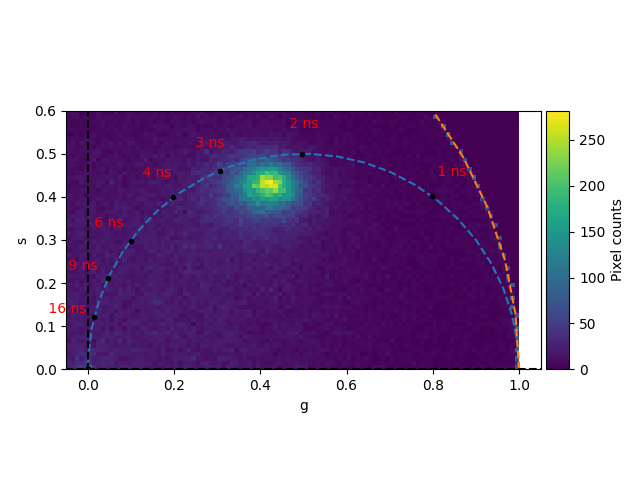

In [38]:
%matplotlib widget

hf_phasors_per_pixel = h5py.File( r"C:\Users\fdelbufalo\Desktop\images\Open_confocal\G3BP1_29_05_2024_phasors_matrix.h5", "r")
print(hf_phasors_per_pixel.keys())

phasors_pix_sum = hf_phasors_per_pixel["h5_dataset_phasor_pix"]  # data with phasors in each pixel

print(phasors_pix_sum.shape)

flim.plot_phasor(phasors_pix_sum[:], bins_2dplot=200, log_scale=False, quadrant='first', dfd_freq = 80e6)

In [46]:
tau_m_sum = flim.calculate_tau_m(np.real(phasors_pix_sum), np.imag(phasors_pix_sum), dfd_freq = 80e6)
print(tau_m_sum.shape)

(512, 512)


(array([19847.,  4224.,  4464.,  5179.,  5918.,  6722.,  7326.,  8590.,
        12253., 17459., 18852., 14780., 11585., 10297.,  8590.,  7803.,
         6564.,  6193.,  5711.,  5358.,  5094.,  4977.,  4014.,  3584.,
         3263.,  2853.,  2596.,  2249.,  2303.,  2038.,  1797.,  1850.,
         1693.,  1477.,  1505.,  1170.,  1353.,  1044.,   896.,  1089.,
          782.,  1016.,   801.,   714.,   820.,   563.,   583.,   545.,
          671.,   526.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14, 10.4 , 10.66, 10.92, 11.18, 11.44,
        11.7 , 11.96, 12.22, 12.48, 12.74, 13.  ]),
 <BarContainer object of 50 artists>)

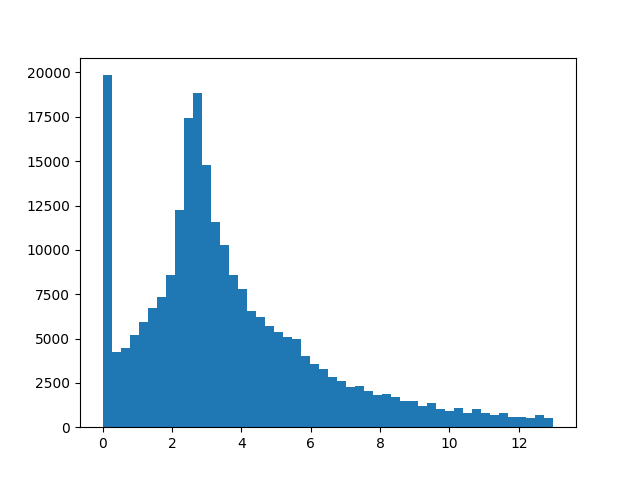

In [51]:
tau_m_data_sum = 1e9*tau_m_sum.flatten()

plt.figure()
plt.hist(tau_m_data_sum, range = (0, 13), bins = 50)

In [48]:
data_intensity_sum = np.sum(data_sum, axis = -1)
print(data_intensity_sum.shape)

(512, 512)


(array([251420.,   8166.,   1095.,    574.,    338.]),
 array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <BarContainer object of 5 artists>)

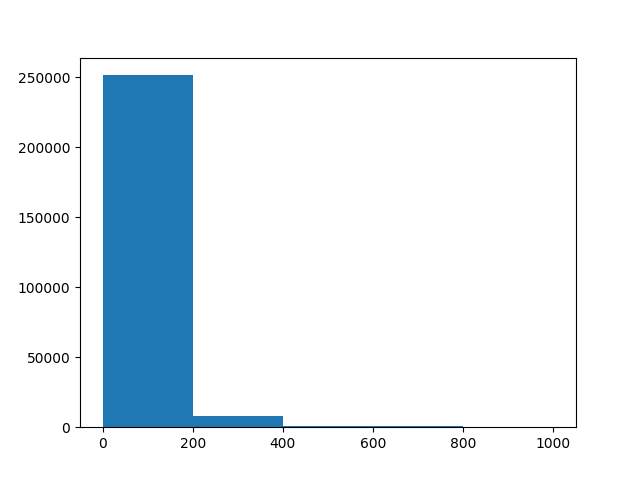

In [49]:
plt.figure()
plt.hist(data_intensity_sum.flatten(), bins = 5 , range = (0, 1000))

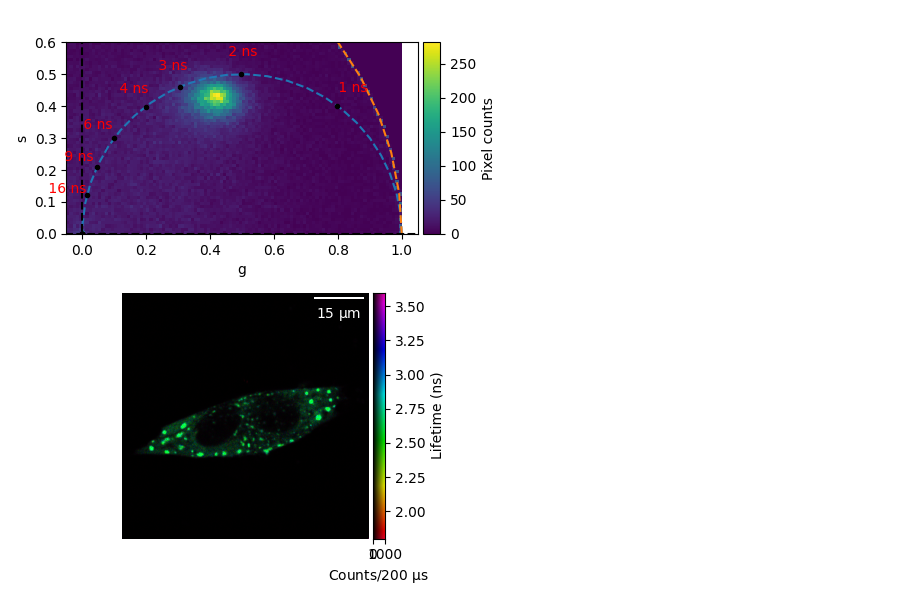

In [50]:
fig = plt.figure(figsize = (9, 6))
gs = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[2:4, 0:2])
flim.plot_phasor(phasors_pix_sum[:], bins_2dplot=200, log_scale=False, quadrant='first', fig = fig, ax = ax1, dfd_freq = 80e6)
gr.show_flim(data_intensity_sum, tau_m_sum*1e9, pxsize = 0.146, pxdwelltime =
             200, lifetime_bounds = (1.8, 3.6), intensity_bounds = (0, 1000),
             fig = fig, ax = ax2)  
fig.tight_layout()
plt.savefig(r"C:\Users\fdelbufalo\Desktop\PDF_processed_images\G3BP1_lifetime_open_confocal.pdf", dpi = 900)

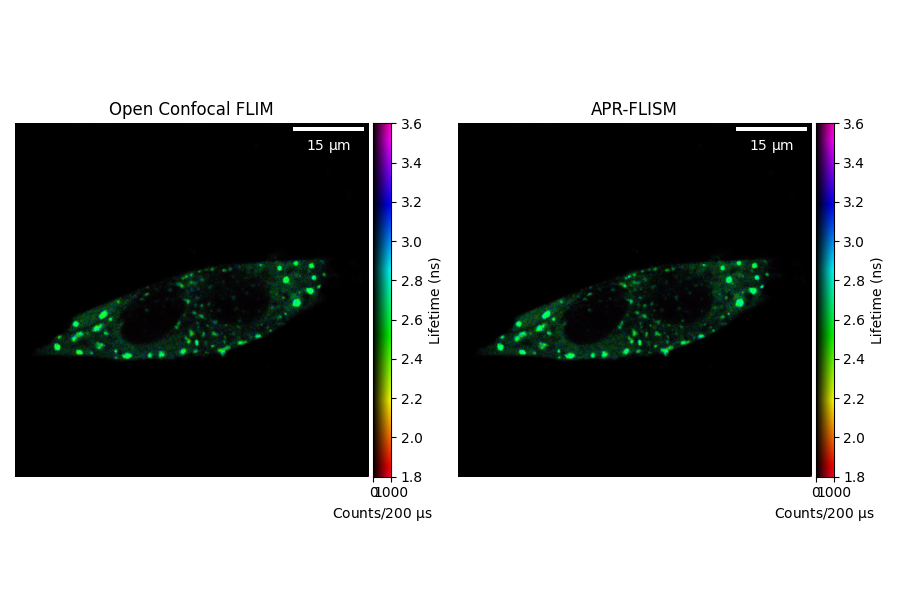

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(9,6))

gr.show_flim(data_intensity_sum, tau_m_sum*1e9, pxsize = 0.146, pxdwelltime =
             200, lifetime_bounds = (1.8, 3.6), intensity_bounds = (0, 1000),
             fig = fig, ax = ax[0])  
ax[0].set_title('Open Confocal FLIM')

gr.show_flim(data_intensity, tau_m*1e9, pxsize = 0.146, pxdwelltime =
             200, lifetime_bounds = (1.8, 3.6), intensity_bounds = (0, 1000),
             fig = fig, ax = ax[1])
ax[1].set_title('APR-FLISM')

fig.tight_layout()